In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[4].shape

(28, 28)

In [ ]:
X_train[4]

<function matplotlib.pyplot.show(close=None, block=None)>

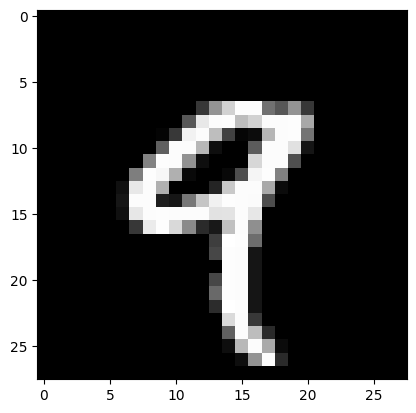

In [8]:
plt.imshow(X_train[4], cmap='gray')
plt.show

In [11]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype("float32") / 255.0

In [12]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [13]:
X_train_noisy = X_train + 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size = X_train.shape)
y_test_noisy =X_test + 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size =X_test.shape)

In [15]:
X_train_noise = np.clip(X_train_noisy,0.1,1.0)
y_test_noisy = np.clip(y_test_noisy,0.1,1.0)

In [ ]:
inputs = Input(shape=(784,))
encoder = Dense(32, activation='relu')(inputs)
decoder = Dense(784, activation='sigmoid')(encoder)
autoencoder = Model(inputs, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_noise, X_train, epochs=100,batch_size=256,shuffle=True,
                validation_data=(y_test_noisy, X_test))

##Here the algorithm searchs for a random image

In [23]:
idx = np.random.randint(X_test.shape[0])
original_image = X_test[idx]

noisy_image = original_image + 0.5 * np.random.normal(loc = 0.0, scale = 1.0, size = original_image.shape)
noisy_image = np.clip(noisy_image,0.0,1.0)

denoised_image = autoencoder.predict(np.expand_dims(noisy_image, axis=0))

denoised_image = denoised_image.reshape((28,28))

1/1 [==============================] - 0s 18ms/step


##Here the alhorithm show three images from the random image of the previous code

(-0.5, 27.5, 27.5, -0.5)

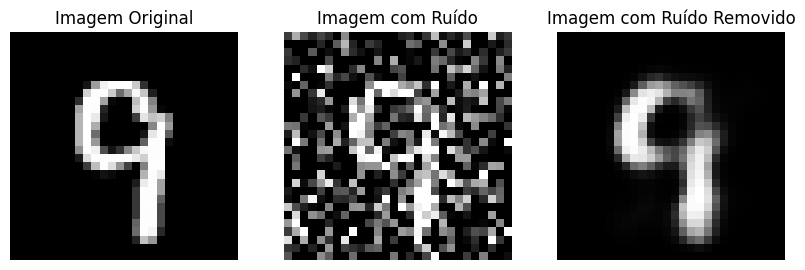

In [24]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(original_image.reshape(28,28), cmap='gray')
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_image.reshape(28,28), cmap='gray')
plt.title('Imagem com Ruído')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(denoised_image.reshape(28,28), cmap='gray')
plt.title('Imagem com Ruído Removido')
plt.axis('off')